In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the csv the file in the colab notebook.

In [3]:
data = pd.read_csv('/content/aerofit_treadmill.csv')

In [4]:
df = pd.DataFrame(data)

Performing the basic data analysis.

In [5]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [6]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Checking the structure of the data.

In [7]:
df.shape

(180, 9)

In [8]:
df.size

1620

In [9]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Checking the datatypes present in the dataframe.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [11]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Checking for any mising values in the data frame .

In [12]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [13]:
df.isnull().sum().sum()

0

Checking for outliers in the dataframe.

In [14]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [15]:
df_lst = list(df.columns)
df_lst

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

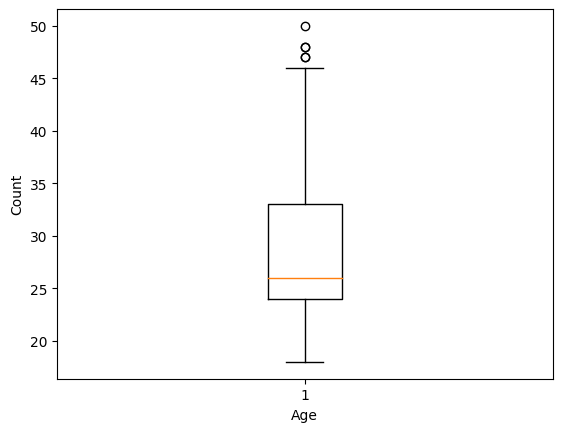

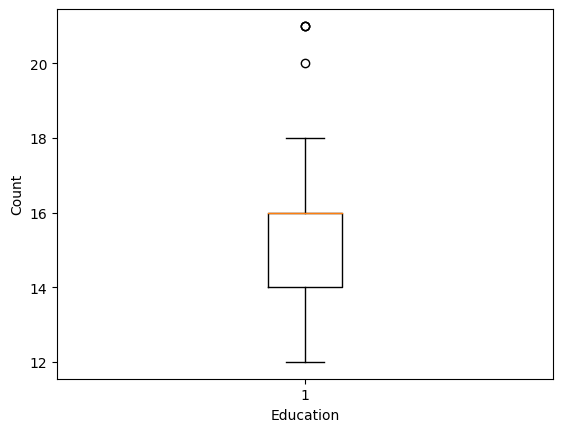

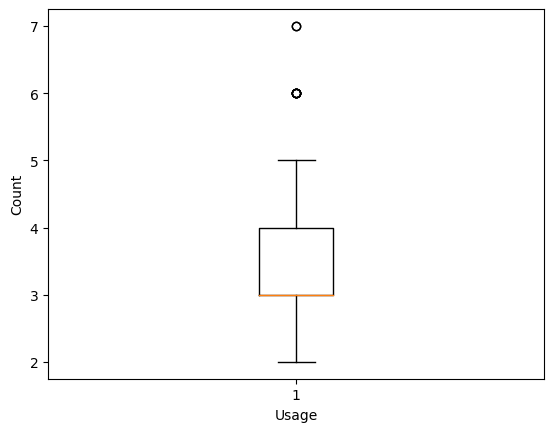

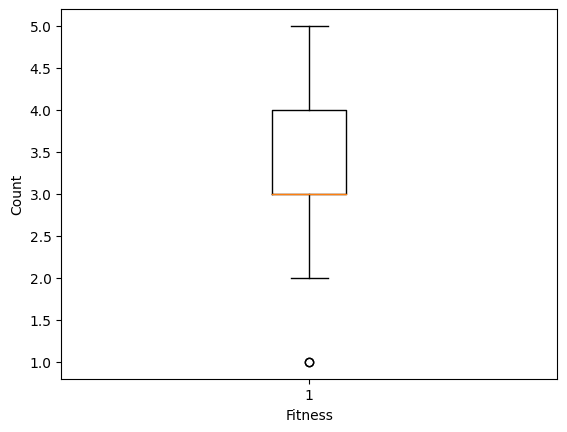

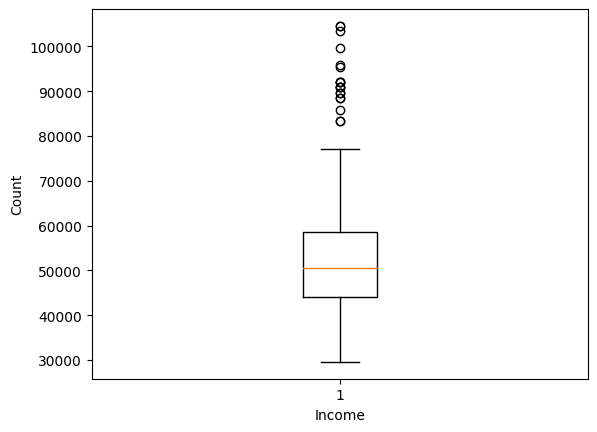

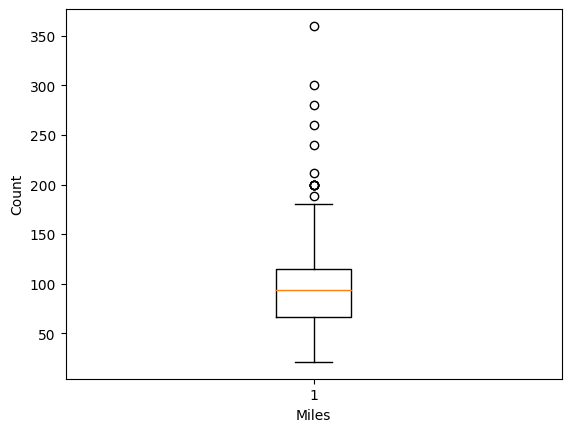

In [16]:
for i in df_lst:
  if df[i].dtype=='int64':
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

From the above boxplot, we can see understand that
'Income' and 'Miles' columns have high number of outliers in the data.

Now on removing the data between 5 percentile to 95 percentile.

In [17]:
# For clipping data for 'Income' Data.

income_low = df['Income'].quantile(0.05)
income_high = df['Income'].quantile(0.95)

np.clip(df['Income'],income_low,income_high,inplace=True)

# For clipping data for 'Miles'.

miles_low = df['Miles'].quantile(0.05)
miles_high = df['Miles'].quantile(0.95)

np.clip(df['Miles'],miles_low,miles_high,inplace=True)


Checking the data after removing the outliers from the original dataset.

In [18]:
df.shape

(180, 9)

In [19]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,34053.15,112
1,KP281,19,Male,15,Single,2,3,34053.15,75
2,KP281,19,Female,14,Partnered,4,3,34053.15,66
3,KP281,19,Male,12,Single,3,3,34053.15,85
4,KP281,20,Male,13,Partnered,4,2,35247.00,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416.00,200
176,KP781,42,Male,18,Single,5,4,89641.00,200
177,KP781,45,Male,16,Single,5,5,90886.00,160
178,KP781,47,Male,18,Partnered,4,5,90948.25,120


In [20]:
#Gender

df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

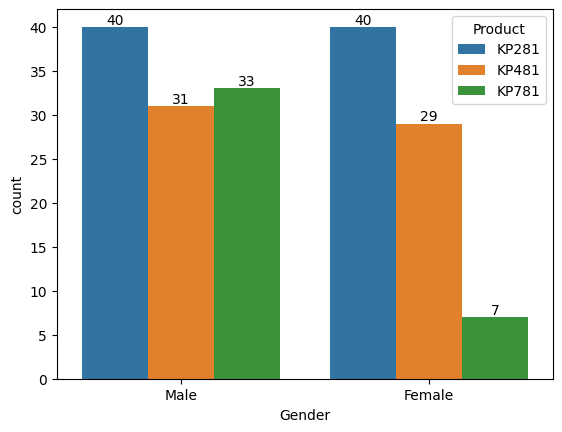

In [21]:
#Applying the graphcal representation

c=sns.countplot(x=df['Gender'],hue =df['Product'])
c.bar_label(c.containers[0])
c.bar_label(c.containers[1])
c.bar_label(c.containers[2])
plt.show()

Checking the features like categorical data's effect on product.

In [22]:
#Marital Status

df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

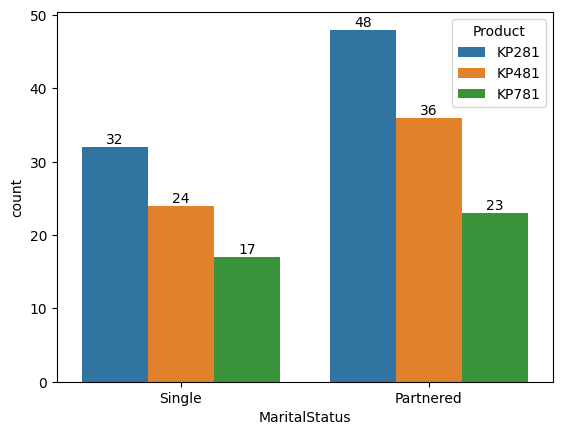

In [23]:
#Applying the graphical representation

b=sns.countplot(x=df['MaritalStatus'],hue=df['Product'])
b.bar_label(b.containers[0])
b.bar_label(b.containers[1])
b.bar_label(b.containers[2])
plt.show()

In [24]:
for i in df_lst:
  if df[i].dtype!='object':
    print(i)

Age
Education
Usage
Fitness
Income
Miles


Checking the relationship between continous variables and product.

In [25]:
#Age v/s Product relationship

df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

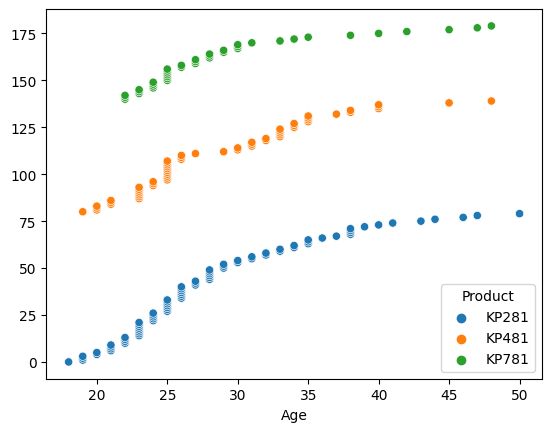

In [45]:
#Applying the graphical representation

sns.scatterplot(x=df['Age'],y=df['Age'].index,hue=df['Product'])
plt.show()

In [27]:
#Education

df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

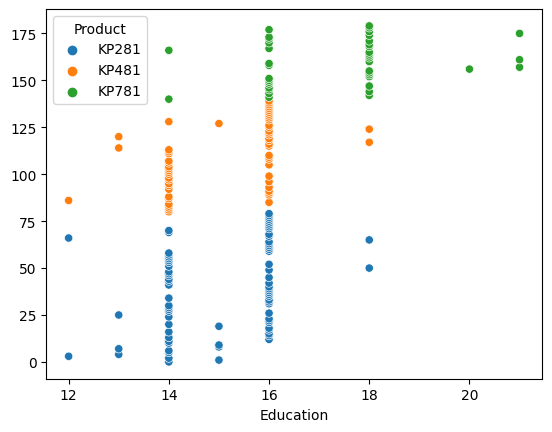

In [44]:
#Graphical Representation of Education and Product.

sns.scatterplot(x=df['Education'],y=df['Education'].index,hue=df['Product'])
plt.show()

In [29]:
#Usage

df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

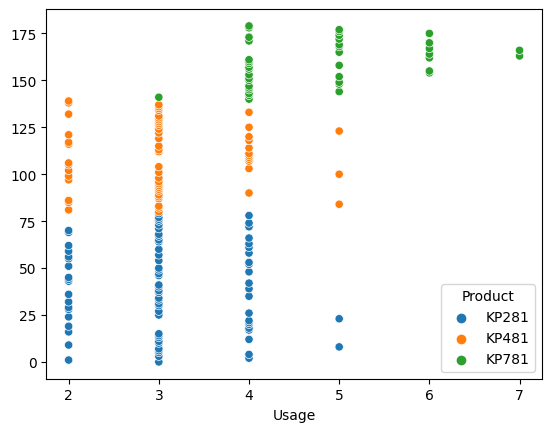

In [41]:
#Graphical Representation of Usage and Product

sns.scatterplot(data=df,x='Usage',y=df['Usage'].index,hue='Product')
plt.show()

In [30]:
#Fitness

df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

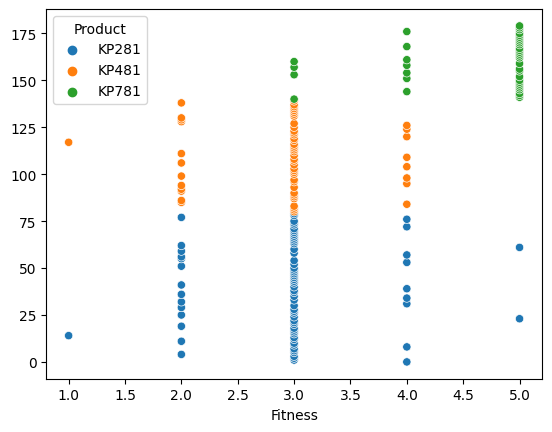

In [31]:
#Graphical Representation of Fitness and Product

sns.scatterplot(data=df,x=df['Fitness'],
                y=df['Fitness'].index,
                hue='Product')
plt.show()

In [32]:
#Income

df['Income'].value_counts()

45480.00    14
52302.00     9
34053.15     9
90948.25     9
54576.00     8
46617.00     8
53439.00     8
51165.00     7
50028.00     7
40932.00     6
48891.00     5
34110.00     5
35247.00     5
38658.00     5
43206.00     5
57987.00     4
36384.00     4
44343.00     4
60261.00     3
90886.00     3
59124.00     3
64809.00     3
67083.00     2
48556.00     2
37521.00     2
39795.00     2
88396.00     2
83416.00     2
64741.00     2
49801.00     2
56850.00     2
61006.00     2
89641.00     2
61398.00     2
47754.00     2
42069.00     2
54781.00     1
74701.00     1
85906.00     1
52290.00     1
77191.00     1
55713.00     1
68220.00     1
69721.00     1
75946.00     1
58516.00     1
70966.00     1
62251.00     1
65220.00     1
62535.00     1
57271.00     1
48658.00     1
53536.00     1
52291.00     1
Name: Income, dtype: int64

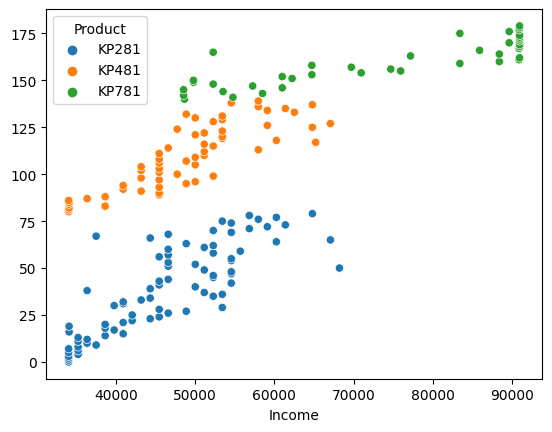

In [33]:
#Graphical representation of relationship betweeen income and product.

sns.scatterplot(data=df,x=df['Income'],y=df['Income'].index,hue='Product')
plt.show()

In [34]:
#Miles

mi = df[['Miles']].value_counts().reset_index()
mi.columns = ['Miles','Counts']
mi

,Miles,Counts
0,85,27
1,47,17
2,95,12
3,200,12
4,66,10
5,75,10
6,106,9
7,94,8
8,113,8
9,100,7


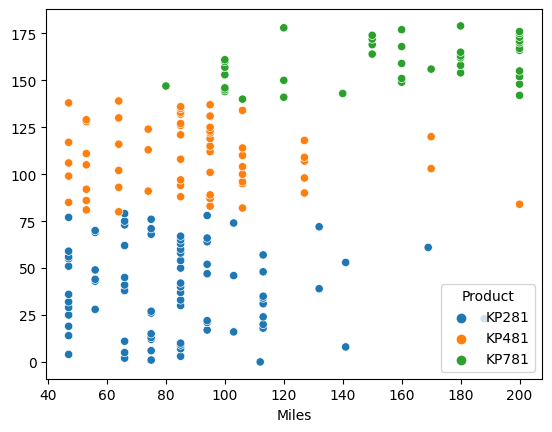

In [35]:
#Graphical Representation of Miles and product

sns.scatterplot(data=df,x='Miles'
                ,y=df['Miles'].index
                ,hue=df['Product'])
plt.show()

Finding the Marginal and conditional Probability of 'Gender' v/s product.


In [64]:
pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [65]:
marg_gen = pd.crosstab(df['Product'],df['Gender'],normalize=True)
marg_gen

Gender,Female,Male
Product,,
KP281,0.222222,0.222222
KP481,0.161111,0.172222
KP781,0.038889,0.183333


In [66]:
marginal_gen=pd.crosstab(df['Product'],df['Gender'],margins=True,normalize = True)
marginal_gen

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


From the marginal probability, we can say:

The probability of purchase for Male customer : 57.77%

Probability of male purchasing KP281 : 22.2%
Probability of male purchasing KP481 : 17.2%
Probabiltiy of male purchasing KP781 : 18.3%

The probability of purchase for Female customer : 42.22%

Probability of female purchasing KP281 : 22.22%
Probability of female purchasing KP481 : 16.11%
Probabiltiy of female purchasing KP781 : 3.88%

In [67]:
q=marg_gen.sum(axis=0)
q

Gender
Female    0.422222
Male      0.577778
dtype: float64

In [68]:
cond_gen = marg_gen.divide(q,axis=1)
cond_gen

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


From conditional distribution of data,
By dividing the percentage of purchase by male customer i.e. 57.7%, we can conclude:
38.4% of males purchased KP281 model.
29.8% of males purchased KP481 model.
31.7% of males purchased KP781 model.

From conditional distribution of data,
By dividing the percentage of purchase by female customer i.e. 42.2%, we can conclude:
52.6% of females purchased KP281 model.
38.1% of females purchased KP481 model.
9.2% of females purchased KP781 model.

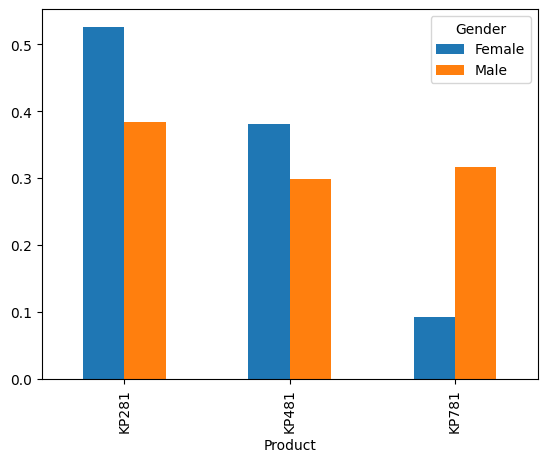

In [90]:
cond_gen.plot(kind='bar')
plt.show()

Finding the marginal and conditional for Age v/s Product


In [72]:
mar_age = pd.crosstab(df['Product'],df['Age'],normalize=True)
mar_age

Age,18,19,20,21,22,23,24,25,26,27,...,40,41,42,43,44,45,46,47,48,50
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0.005556,0.016667,0.011111,0.022222,0.022222,0.044444,0.027778,0.038889,0.038889,0.016667,...,0.005556,0.005556,0.000000,0.005556,0.005556,0.000000,0.005556,0.005556,0.000000,0.005556
KP481,0.000000,0.005556,0.016667,0.016667,0.000000,0.038889,0.016667,0.061111,0.016667,0.005556,...,0.016667,0.000000,0.000000,0.000000,0.000000,0.005556,0.000000,0.000000,0.005556,0.000000
KP781,0.000000,0.000000,0.000000,0.000000,0.016667,0.016667,0.022222,0.038889,0.011111,0.016667,...,0.005556,0.000000,0.005556,0.000000,0.000000,0.005556,0.000000,0.005556,0.005556,0.000000


Since, the distribution of ages is vast, we try to divide into buckets i.e. bins.

In [78]:
bins = [17,30,40,51]
labels=['18-30','30-40','40-50']
df['Age_range'] = pd.cut(df['Age'],bins=bins,labels=labels)

In [81]:
mar_age = pd.crosstab(df['Product'],df['Age_range'],normalize=True)
mar_age

Age_range,18-30,30-40,40-50
Product,,,
KP281,0.305556,0.105556,0.033333
KP481,0.194444,0.127778,0.011111
KP781,0.166667,0.033333,0.022222


In [83]:
marginal_age =  pd.crosstab(df['Product'],df['Age_range'],margins=True,normalize=True)
marginal_age

Age_range,18-30,30-40,40-50,All
Product,,,,
KP281,0.305556,0.105556,0.033333,0.444444
KP481,0.194444,0.127778,0.011111,0.333333
KP781,0.166667,0.033333,0.022222,0.222222
All,0.666667,0.266667,0.066667,1.000000


From marginal distribution of data,
Percentage of purchase by customer of Age between 18-30 is 66.6%

Probability of customer purchasing KP281 : 30.5%
Probability of customer purchasing KP481 : 19.4%
Probabiltiy of customer purchasing KP781 : 16.6%


Percentage of purchase by customer of Age between 30-40 is. 26.6%:

Probability of customer purchasing KP281 : 10.5%
Probability of customer purchasing KP481 : 12.7%
Probabiltiy of customer purchasing KP781 : 3.3%

Percentage of purchase by customer of Age between 40-50 is 6.6%:


Probability of customer purchasing KP281 : 3.3%
Probability of customer purchasing KP481 : 1.1%
Probabiltiy of customer purchasing KP781 : 2.2%



In [85]:
r=mar_age.sum(axis=0)
r

Age_range
18-30    0.666667
30-40    0.266667
40-50    0.066667
dtype: float64

In [86]:
cond_age=mar_age.divide(r,axis=1)
cond_age

Age_range,18-30,30-40,40-50
Product,,,
KP281,0.458333,0.395833,0.500000
KP481,0.291667,0.479167,0.166667
KP781,0.250000,0.125000,0.333333


From conditional distribution of data,
By dividing the percentage of purchase by customer of Age between 18-30 i.e. 66.6%, we can conclude:

45.8% of customers of age between 18-30 have purchased KP281 model.
29.1% of customers of age between 18-30 have purchased KP481 model.
25% of customers of age between 18-30 have purchased KP781 model.

By dividing the percentage of purchase by customer of Age between 30-40 i.e. 26.6%, we can conclude:

39.5% of customers of age between 18-30 have purchased KP281 model.
47.9% of customers of age between 18-30 have purchased KP481 model.
12.5% of customers of age between 18-30 have purchased KP781 model.

By dividing the percentage of purchase by customer of Age between 40-50 i.e. 6.6%, we can conclude:

50% of customers of age between 18-30 have purchased KP281 model.
16.6% of customers of age between 18-30 have purchased KP481 model.
33.3% of customers of age between 18-30 have purchased KP781 model.

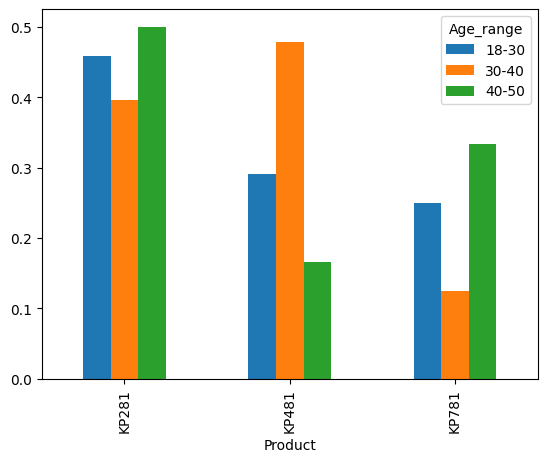

In [89]:
cond_age.plot(kind='bar')
plt.show()

Finding the marginal and conditional probability for Education v/s Product.

In [92]:
mar_edu =pd.crosstab(df['Product'],df['Education'],normalize=True)
mar_edu

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.011111,0.016667,0.166667,0.022222,0.216667,0.011111,0.000000,0.000000
KP481,0.005556,0.011111,0.127778,0.005556,0.172222,0.011111,0.000000,0.000000
KP781,0.000000,0.000000,0.011111,0.000000,0.083333,0.105556,0.005556,0.016667


In [93]:
marginal_edu = pd.crosstab(df['Product'],df['Education'],margins=True,normalize=True)
marginal_edu

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,0.011111,0.016667,0.166667,0.022222,0.216667,0.011111,0.000000,0.000000,0.444444
KP481,0.005556,0.011111,0.127778,0.005556,0.172222,0.011111,0.000000,0.000000,0.333333
KP781,0.000000,0.000000,0.011111,0.000000,0.083333,0.105556,0.005556,0.016667,0.222222
All,0.016667,0.027778,0.305556,0.027778,0.472222,0.127778,0.005556,0.016667,1.000000


From marginal distribution of data,

Percentage of purchase by customer of education of 14 years i.e. 30.5%, we can conclude:

Probability of customer purchasing KP281 : 16.6%
Probability of customer purchasing KP481 : 12.7%
Probabiltiy of customer purchasing KP781 : 1.1%

Percentage of purchase by customer of education of 16 years i.e. 47.2%, we can conclude:

Probability of customer purchasing KP281 : 21.6%
Probability of customer purchasing KP481 : 17.2%
Probabiltiy of customer purchasing KP781 : 8.3%

Percentage of purchase by customer of education of 18 years i.e. 12.7%, we can conclude:

Probability of customer purchasing KP281 : 1.1%
Probability of customer purchasing KP481 : 1.1%
Probabiltiy of customer purchasing KP781 : 10.5%

For the customers of educational experience of 12,13,15,17,20,21 are not given due to very low probability.


In [96]:
s=mar_edu.sum(axis=0)
s

Education
12    0.016667
13    0.027778
14    0.305556
15    0.027778
16    0.472222
18    0.127778
20    0.005556
21    0.016667
dtype: float64

In [97]:
cond_edu = mar_edu.divide(s,axis=1)
cond_edu

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.086957,0.0,0.0
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.086957,0.0,0.0
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.826087,1.0,1.0


From conditional distribution of data,
By dividing the percentage of purchase by customer of educational experience of 14 years i.e. 30.5%, we can conclude:

54.5% of customers of educational experience of 14 years have purchased KP281 model.
41.8% of customers of educational experience of 14 years have purchased KP481 model.
3.6% of customers of educational experience of 14 years have purchased KP781 model.

By dividing the percentage of purchase by customer of educational experience of 16 years i.e. 47.2%, we can conclude:

45.8% of customers of educational experience of 16 years have purchased KP281 model.
36.4% of customers of educational experience of 16 years have purchased KP481 model.
17.6% of customers of educational experience of 16 years have purchased KP781 model.

By dividing the percentage of purchase by customer of educational experience of 18 years i.e. 12.7%, we can conclude:

8.6% of customers of educational experience of 18 years have purchased KP281 model.
8.6% of customers of educational experience of 18 years have purchased KP481 model.
82.6% of customers of educational experience of 18 years have purchased KP781 model.


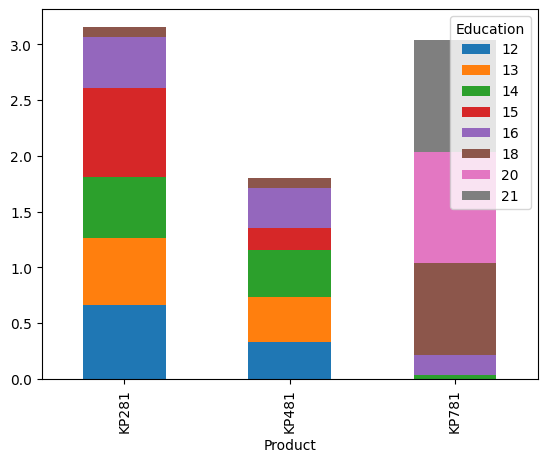

In [123]:
cond_edu.plot(kind='bar',stacked=True)
plt.show()

Finding the marginal and conditional Probability for MaritalStatus v/s Product

In [107]:
mar_sta = pd.crosstab(df['Product'],df['MaritalStatus'],normalize=True)
mar_sta

MaritalStatus,Partnered,Single
Product,,
KP281,0.266667,0.177778
KP481,0.200000,0.133333
KP781,0.127778,0.094444


In [108]:
marginal_sta = pd.crosstab(df['Product'],df['MaritalStatus'],margins=True,normalize=True)
marginal_sta

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


From the marginal probability, we can say:

The probability of purchase for Partnered customer : 59.44%

Probability of Partnered customer purchasing KP281 : 26.66%
Probability of Partnered customer purchasing KP481 : 20%
Probabiltiy of Partnered customer purchasing KP781 : 12.7%

The probability of purchase for Single customer : 40.5%

Probability of Single customer purchasing KP281 : 17.7%
Probability of Single customer purchasing KP481 : 13.3%
Probabiltiy of Single customer purchasing KP781 : 9.4%

In [109]:
t = mar_sta.sum(axis=0)
t

MaritalStatus
Partnered    0.594444
Single       0.405556
dtype: float64

In [110]:
cond_sta = mar_sta.divide(t,axis=1)
cond_sta

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


From conditional distribution of data,
By dividing the percentage of purchase by Partnered customer i.e. 59.44%, we can conclude:

44.4% of Partnered customer purchased KP281 model.
33.6% of Partnered customer purchased KP481 model.
21.4% of Partnered customer purchased KP781 model.

From conditional distribution of data,
By dividing the percentage of purchase by Single customer i.e. 40.5%, we can conclude:

43.8% of Single customer purchased KP281 model.
32.8% of Single customer purchased KP481 model.
23.2% of Single customer purchased KP781 model.

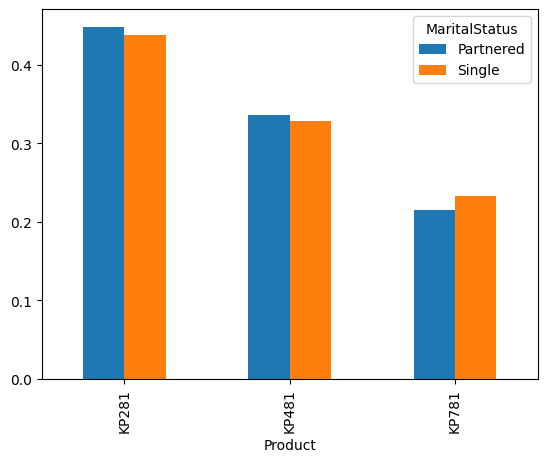

In [122]:
cond_sta.plot(kind='bar')
plt.show()

Finding the marginal and condtional probability for Usage v/s Product.

In [114]:
mar_usa = pd.crosstab(df['Product'],df['Usage'],normalize = True)
mar_usa

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111


In [115]:
marginal_usa = pd.crosstab(df['Product'],df['Usage'],margins = True,normalize = True)
marginal_usa

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000,0.444444
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000,0.333333
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111,0.222222
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111,1.000000


From marginal distribution of data,

Percentage of purchase by customer of Usage of 3 weeks i.e. 38.3%:

Probability of customer purchasing KP281 : 20.5%
Probability of customer purchasing KP481 : 17.2%
Probabiltiy of customer purchasing KP781 : 0.5%

Percentage of purchase by customer of Usage of 4 weeks i.e. 28.8%:

Probability of customer purchasing KP281 : 12.2%
Probability of customer purchasing KP481 : 6.6%
Probabiltiy of customer purchasing KP781 : 10%


Customers of usage of weeks of 2,5,6,7 are neglected due to very low or no probability.



In [116]:
u = mar_usa.sum(axis=0)
u

Usage
2    0.183333
3    0.383333
4    0.288889
5    0.094444
6    0.038889
7    0.011111
dtype: float64

In [117]:
cond_usa = mar_usa.divide(u,axis=1)
cond_usa

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0


From conditional distribution of data,
By dividing the percentage of purchase by Usage of 3 weeks i.e. 38.3%, we can conclude:

53.6% of customer of Usage of 3 weeks purchased KP281 model.
44.9% of customer of Usage of 3 weeks purchased KP481 model.
1.4% of customer of Usage of 3 weeks purchased KP781 model.

By dividing the percentage of purchase by Usage of 4 weeks i.e. 28.8%, we can conclude:

42.3% of customer of Usage of 4 weeks purchased KP281 model.
23.07% of customer of Usage of 4 weeks purchased KP481 model.
34.61% of customer of Usage of 4 weeks purchased KP781 model.


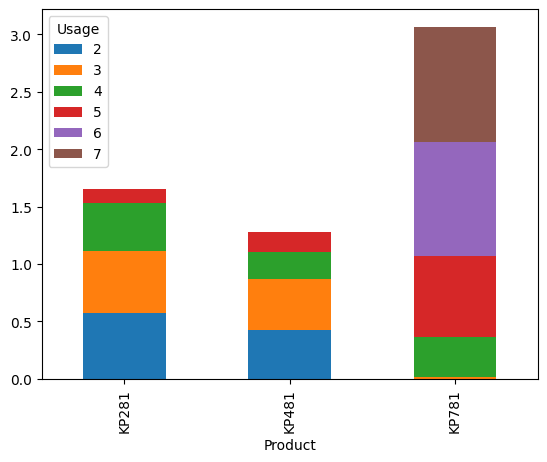

In [121]:
cond_usa.plot(kind='bar',stacked=True)
plt.show()

Finding marginal and conditional probability of

In [124]:
mar_fit = pd.crosstab(df['Product'],df['Fitness'],normalize = True)
mar_fit

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111
KP481,0.005556,0.066667,0.216667,0.044444,0.000000
KP781,0.000000,0.000000,0.022222,0.038889,0.161111


In [125]:
marginal_fit = pd.crosstab(df['Product'],df['Fitness'],margins = True,normalize = True)
marginal_fit

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111,0.444444
KP481,0.005556,0.066667,0.216667,0.044444,0.000000,0.333333
KP781,0.000000,0.000000,0.022222,0.038889,0.161111,0.222222
All,0.011111,0.144444,0.538889,0.133333,0.172222,1.000000


From marginal distribution of data,

Percentage of purchase by customer of Fitness of 3 scale i.e. 53.88%:

Probability of customer of Fitness of 3 scale purchasing KP281 : 30%
Probability of customer of Fitness of 3 scale purchasing KP481 : 21.6%
Probabiltiy of customer of Fitness of 3 scale  purchasing KP781 : 2.2%

Percentage of purchase by customer of Fitness of 4 scale i.e. 13.33%:

Probability of customer of Fitness of 4 scale purchasing KP281 : 5%
Probability of customer of Fitness of 4 scale purchasing KP481 : 4.4%
Probabiltiy of customer of Fitness of 4 scale  purchasing KP781 : 3.8%

Customers of usage of weeks of 1,2,5 are neglected due to very low or no probability.


In [126]:
v=mar_fit.sum(axis=0)
v

Fitness
1    0.011111
2    0.144444
3    0.538889
4    0.133333
5    0.172222
dtype: float64

In [127]:
cond_fit = mar_fit.divide(v,axis=1)
cond_fit

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516
KP481,0.5,0.461538,0.402062,0.333333,0.000000
KP781,0.0,0.000000,0.041237,0.291667,0.935484


From conditional distribution of data,
By dividing the percentage of purchase by customer of Fitness of 3 scale i.e 53.88%:

55.6% of customer of Fitness of 3 scale purchased KP281 model.
40.2% of customer of Fitness of 3 scale purchased KP481 model.
4.1% of customer of Fitness of 3 scale purchased KP781 model.

By dividing the percentage of purchase by customer of Fitness of 4 scale i.e 53.88%:

37.5% of customer of Fitness of 4 scale purchased KP281 model.
33.3% of customer of Fitness of 4 scale purchased KP481 model.
29.1% of customer of Fitness of 4 scale purchased KP781 model.



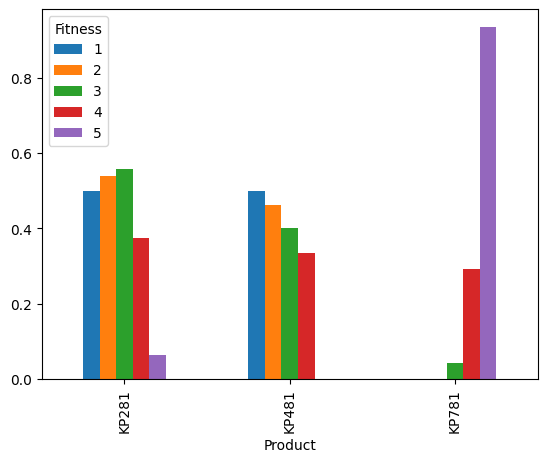

In [129]:
cond_fit.plot(kind='bar')
plt.show()

Finding the marginal and conditional probability of Income v/s Product.

In [130]:
mar_inc = pd.crosstab(df['Product'],df['Income'],normalize=True)
mar_inc

Income,34053.15,34110.00,35247.00,36384.00,37521.00,38658.00,39795.00,40932.00,42069.00,43206.00,...,70966.00,74701.00,75946.00,77191.00,83416.00,85906.00,88396.00,89641.00,90886.00,90948.25
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0.033333,0.011111,0.027778,0.016667,0.011111,0.016667,0.011111,0.022222,0.011111,0.005556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
KP481,0.016667,0.016667,0.000000,0.005556,0.000000,0.011111,0.000000,0.011111,0.000000,0.022222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
KP781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005556,0.005556,0.005556,0.005556,0.011111,0.005556,0.011111,0.011111,0.016667,0.05


Since, The data is spread into many columns, we use bins to divide the data in range.

In [138]:
bins = [34000,45000,50000,60000,70000,91000]
labels = ['35000-45000','45000-50000','50000-60000','60000-70000','70000-90000']
df['Income_Range'] = pd.cut(df['Income'], bins=bins, labels=labels)

In [139]:
mar_inc = pd.crosstab(df['Product'],df['Income_Range'],normalize=True)
mar_inc

Income_Range,35000-45000,45000-50000,50000-60000,60000-70000,70000-90000
Product,,,,,
KP281,0.188889,0.077778,0.144444,0.033333,0.000000
KP481,0.083333,0.083333,0.127778,0.038889,0.000000
KP781,0.000000,0.027778,0.033333,0.033333,0.127778


In [140]:
marginal_inc = pd.crosstab(df['Product'],df['Income_Range'],margins=True,normalize=True)
marginal_inc

Income_Range,35000-45000,45000-50000,50000-60000,60000-70000,70000-90000,All
Product,,,,,,
KP281,0.188889,0.077778,0.144444,0.033333,0.000000,0.444444
KP481,0.083333,0.083333,0.127778,0.038889,0.000000,0.333333
KP781,0.000000,0.027778,0.033333,0.033333,0.127778,0.222222
All,0.272222,0.188889,0.305556,0.105556,0.127778,1.000000


From marginal distribution of data,

Percentage of purchase by customer of Income between 45,000-50,000 i.e. 18.8%:

Probability of customer of Income between 45,000-50,000 purchasing KP281 : 7.7%
Probability of customer of Income between 45,000-50,000 purchasing KP481 : 8.3%
Probabiltiy of customer Income between 45,000-50,000 purchasing KP781 : 2.7%

Percentage of purchase by customer of Income between 50,000-60,000 i.e. 30.55%:

Probability of customer of Income between 50,000-60,000 purchasing KP281 : 14.4%
Probability of customer of Income between 50,000-60,000 purchasing KP481 : 12.7%
Probabiltiy of customer Income between 50,000-60,000 purchasing KP781 : 3.3%

Customers of Income between [30000-45000,60000-70000,70000-90000] are neglected due to very low or no probability.

In [141]:
w=mar_inc.sum(axis=0)
w

Income_Range
35000-45000    0.272222
45000-50000    0.188889
50000-60000    0.305556
60000-70000    0.105556
70000-90000    0.127778
dtype: float64

In [142]:
cond_inc = mar_inc.divide(w,axis=1)
cond_inc

Income_Range,35000-45000,45000-50000,50000-60000,60000-70000,70000-90000
Product,,,,,
KP281,0.693878,0.411765,0.472727,0.315789,0.0
KP481,0.306122,0.441176,0.418182,0.368421,0.0
KP781,0.000000,0.147059,0.109091,0.315789,1.0


From conditional distribution of data,
By dividing the percentage of purchase by customer of Income between 45,000-50,000 i.e. 18.8%:

41.1% of customer of Income between 45,000-50,000  purchased KP281 model.
44.1% of customer of Income between 45,000-50,000  purchased KP481 model.
14.7% of customer of Income between 45,000-50,000  purchased KP781 model.

By dividing the percentage of purchase by customer of Income between 50,000-60,000 i.e. 30.55%:

47.2% of customer of Income between 50,000-60,000  purchased KP281 model.
41.8% of customer of Income between 50,000-60,000  purchased KP481 model.
10.9% of customer of Income between 50,000-60,000  purchased KP781 model.

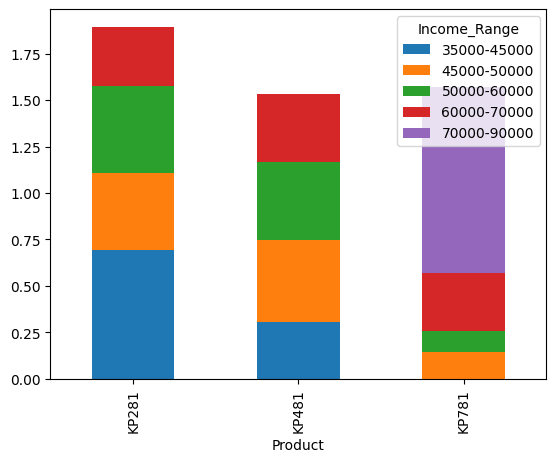

In [145]:
cond_inc.plot(kind='bar',stacked=True)
plt.show()

Finding the marginal and condtional probability of Miles v/s Product.

In [146]:
mar_mil = pd.crosstab(df['Product'],df['Miles'],normalize=True)
mar_mil

Miles,47,53,56,64,66,74,75,80,85,94,...,132,140,141,150,160,169,170,180,188,200
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0.066667,0.000000,0.033333,0.000000,0.055556,0.000000,0.055556,0.000000,0.088889,0.044444,...,0.011111,0.000000,0.011111,0.000000,0.000000,0.005556,0.000000,0.000000,0.005556,0.000000
KP481,0.027778,0.038889,0.000000,0.033333,0.000000,0.016667,0.000000,0.000000,0.061111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.005556
KP781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005556,0.000000,0.000000,...,0.000000,0.005556,0.000000,0.022222,0.027778,0.000000,0.005556,0.033333,0.000000,0.061111


Since,the data presented is in high in number, we use bins to arrange them in limits for better readability.

In [151]:
bins = [46,100,150,201]
labels = ['47-100','100-150','150-200']
df['Mile_Range'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_diff,Age_range,Income_Bins,Income_Range,Mile_Bins,Mile_Range
0,KP281,18,Male,14,Single,3,4,34053.15,112,18-30,18-30,35000-45000,35000-45000,100-150,100-150
1,KP281,19,Male,15,Single,2,3,34053.15,75,18-30,18-30,35000-45000,35000-45000,47-100,47-100
2,KP281,19,Female,14,Partnered,4,3,34053.15,66,18-30,18-30,35000-45000,35000-45000,47-100,47-100
3,KP281,19,Male,12,Single,3,3,34053.15,85,18-30,18-30,35000-45000,35000-45000,47-100,47-100
4,KP281,20,Male,13,Partnered,4,2,35247.00,47,18-30,18-30,35000-45000,35000-45000,47-100,47-100


In [164]:
mar_mil = pd.crosstab(df['Product'],df['Mile_Range'],normalize=True)
mar_mil

Mile_Range,47-100,100-150,150-200
Product,,,
KP281,0.344444,0.088889,0.011111
KP481,0.244444,0.072222,0.016667
KP781,0.044444,0.050000,0.127778


In [165]:
marginal_mil = pd.crosstab(df['Product'],df['Mile_Range'],margins=True,normalize=True)
marginal_mil

Mile_Range,47-100,100-150,150-200,All
Product,,,,
KP281,0.344444,0.088889,0.011111,0.444444
KP481,0.244444,0.072222,0.016667,0.333333
KP781,0.044444,0.050000,0.127778,0.222222
All,0.633333,0.211111,0.155556,1.000000


For the marginal distribution,
The percentage of customer who ran 47-100 miles that purchased the product 63.33%:   
Probabilty of customer purchasing the KP281 product is 34.44%
Probabilty of customer purchasing the KP481 product is 24.44%
Probabilty of customer purchasing the KP781 product is 4.44%

The percentage of customer who ran 100-150 miles that purchased the product 21.11%:   
Probabilty of customer purchasing the KP281 product is 8.8%
Probabilty of customer purchasing the KP481 product is 7.2%
Probabilty of customer purchasing the KP781 product is 5%

The percentage of customer who ran 150-200 miles that purchased the product 15.55%:   
Probabilty of customer purchasing the KP281 product is 1.1%
Probabilty of customer purchasing the KP481 product is 1.6%
Probabilty of customer purchasing the KP781 product is 12.7%

In [166]:
x = mar_mil.sum(axis=0)
x

Mile_Range
47-100     0.633333
100-150    0.211111
150-200    0.155556
dtype: float64

In [167]:
cond_mil = mar_mil.divide(x,axis=1)
cond_mil

Mile_Range,47-100,100-150,150-200
Product,,,
KP281,0.543860,0.421053,0.071429
KP481,0.385965,0.342105,0.107143
KP781,0.070175,0.236842,0.821429


From conditional distribution of data,
By dividing the percentage of purchase by customer who ran 47-100 miles i.e 63.33%:

54.4% of customer of who ran 47-100 miles purchased KP281 model.
38.5% of customer of who ran 47-100 miles purchased KP481 model.
7.01% of customer of who ran 47-100 miles  purchased KP781 model.

By dividing the percentage of purchase by customer who ran 100-150 miles i.e 21.11%:

42.1% of customer of who ran 100-150 miles purchased KP281 model.
34.2% of customer of who ran 100-150 miles purchased KP481 model.
23.6% of customer of who ran 100-150 miles  purchased KP781 model.


By dividing the percentage of purchase by customer who ran 150-200 miles i.e 15.55%:

7.1% of customer of who ran 150-200 miles purchased KP281 model.
10.7% of customer of who ran 150-200 miles purchased KP481 model.
82.14% of customer of who ran 150-200 miles  purchased KP781 model.


<Axes: xlabel='Product'>

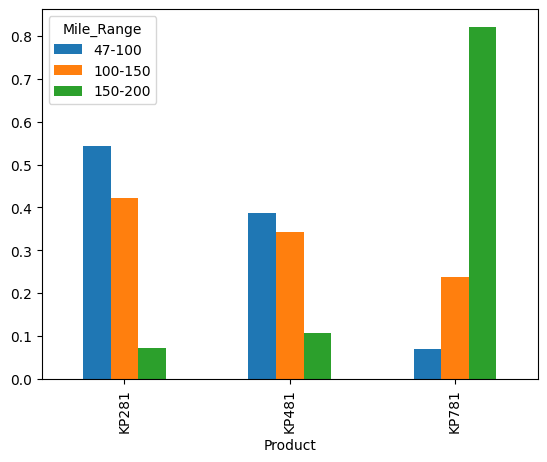

In [168]:
cond_mil.plot(kind='bar')

Correlation between the features of the table.


<ipython-input-169-46cee23e128a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)


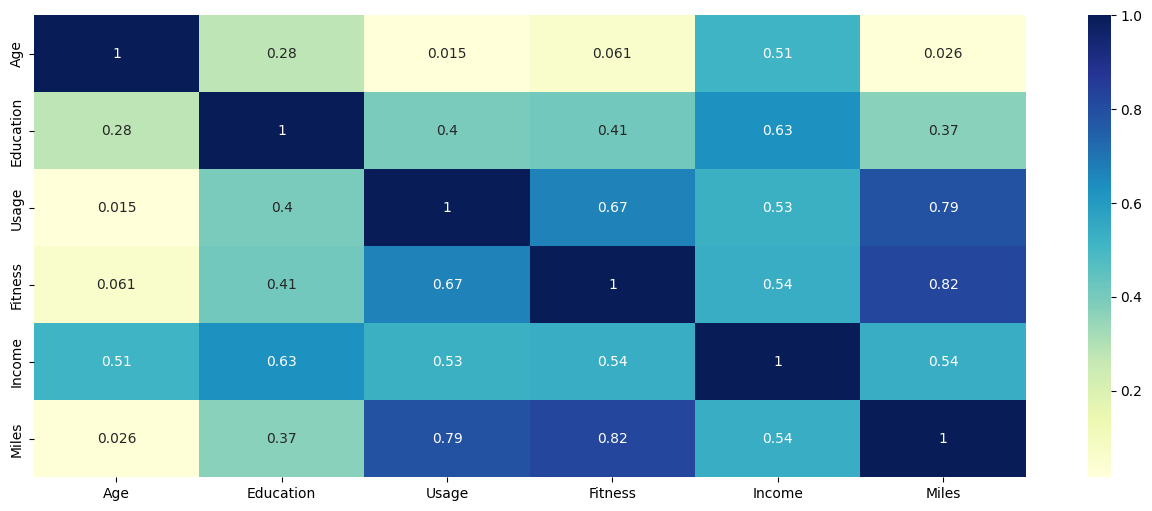

In [169]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

Customer Profiling for Product.

Usual customer for the product KP281:

The gender is mostly a male customer.
The age is around 18 to 40 years.
He has an educational experience around 14 to 16 years.
The marital status is partenered.
The usage of the treadmill is between 3 to 4 weeks.
The fitness scale of the customer is 3.
The income is between 45,000 to 60,000.
The amount of miles ran is between 47 to 100.

Usual customer for the product KP481:

The gender is mostly a male customer.
The age is around 18 to 40 years.
He has an educational experience around 14 to 16 years.
The marital status is partenered.
The usage of the treadmill is between 3 to 4 weeks.
The fitness scale of the customer is 3.
The income is between 45,000 to 60,000.
The amount of miles ran is between 47 to 100.

Usual customer for the product KP781:

The gender is mostly a male customer.
The age is around 18 to 40 years.
He has an educational experience around 16 to 18 years.
The marital status is partenered.
The usage of the treadmill is 4 weeks.
The fitness scale of the customer is 4.
The income is between 45,000 to 60,000.
The amount of miles ran is between 150 to 200.

Insights and Recommendations:

*Amount of male customers are higher in all three, concentrating on women's market is preferred although the percentage difference is not that high, who preferring mostly KP281 model.

*Education experience of 14-18 are interseted in buying the product, hence looking on customers with experience lesser than 14 and higher than 18 is preferrable.

*Income of customer is around 45-60 k, so targeting more wealthy customers is more advicable.
*Usage rate is between 3-4 weeks,the KP781 odel is on lower scale in terms of usage, hence improvement is required.

*Fitness on a average is around 3-4 scale are on high, so, getting sights on unhealthy people is more profitable for sales.